In [ ]:
#Librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("owid-covid-data.csv")
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [15]:
#Conteggio righe e colonne ha il dataset
righe, colonne = df.shape
print("Numero di righe:", righe)
print("Numero di colonne:", colonne)

#Nomi di tutte le colonne
print("\nColonne disponibili nel dataset:")
print(df.columns.tolist())

Numero di righe: 429435
Numero di colonne: 67

Colonne disponibili nel dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',

In [17]:
# Conta i valori mancanti in ogni colonna
missing_values = df.isnull().sum()

# Calcola la percentuale di valori mancanti per ogni colonna
missing_percent = (missing_values / len(df)) * 100

# Crea una tabella riassuntiva
missing_df = pd.DataFrame({
    "Valori mancanti": missing_values,
    "Percentuale (%)": missing_percent
}).sort_values(by="Percentuale (%)", ascending=False)

# Mostra le prime 20 colonne con più valori mancanti
print(missing_df.head(20))

                                         Valori mancanti  Percentuale (%)
weekly_icu_admissions_per_million                 418442        97.440125
weekly_icu_admissions                             418442        97.440125
excess_mortality_cumulative_per_million           416024        96.877059
excess_mortality                                  416024        96.877059
excess_mortality_cumulative                       416024        96.877059
excess_mortality_cumulative_absolute              416024        96.877059
weekly_hosp_admissions_per_million                404938        94.295528
weekly_hosp_admissions                            404938        94.295528
icu_patients                                      390319        90.891287
icu_patients_per_million                          390319        90.891287
hosp_patients_per_million                         388779        90.532677
hosp_patients                                     388779        90.532677
total_boosters_per_hundred            

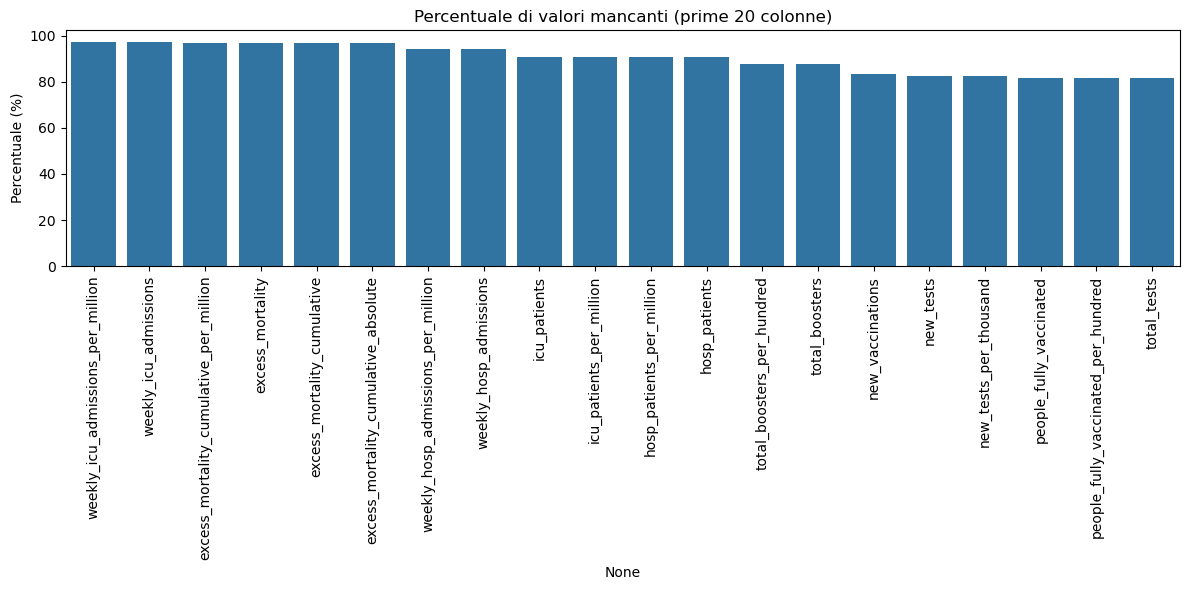

In [19]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x=missing_df.head(20).index,
    y=missing_df.head(20)["Percentuale (%)"]
)

plt.xticks(rotation=90)
plt.title("Percentuale di valori mancanti (prime 20 colonne)")
plt.tight_layout()
plt.show()

In [21]:
# Raggruppa i dati per continente e prende il valore massimo dei casi totali
casi_per_continente = df.groupby("continent")["total_cases"].max()

# Mostra i casi totali per ogni continente
print("Casi totali per continente:")
print(casi_per_continente)

Casi totali per continente:
continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64


In [23]:
#Numero totale di casi a livello mondiale
casi_totali_mondo = df[df["location"] == "World"]["total_cases"].max()

#Percentuale dei casi per ogni continente
percentuali_continente = (casi_per_continente / casi_totali_mondo) * 100

#Risultato
print("Percentuale di casi per continente rispetto al totale mondiale:")
print(percentuali_continente.round(2))  # Arrotonda


Percentuale di casi per continente rispetto al totale mondiale:
continent
Africa            0.52
Asia             12.81
Europe            5.03
North America    13.33
Oceania           1.53
South America     4.83
Name: total_cases, dtype: float64


In [25]:
# Convertiamo la colonna date in formato datatime
df["date"] = pd.to_datetime(df["date"])

# Rimuove le righe che non hanno un continente 
df_continenti = df.dropna(subset=["continent"])


In [27]:
# elenco continenti
continenti = df_continenti["continent"].unique()

# dimnensioni
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

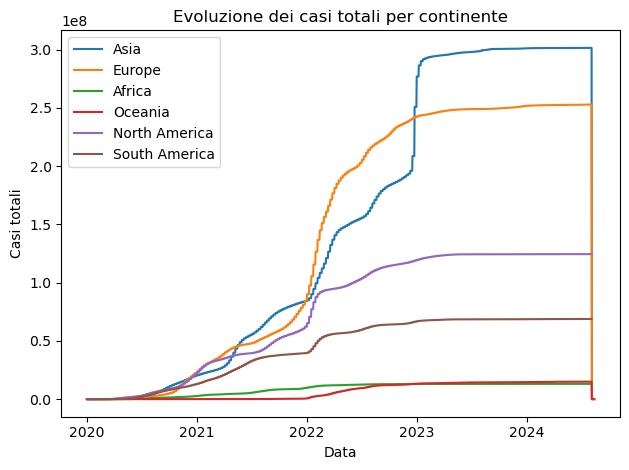

In [29]:
# Per ogni continente, disegniamo la curva dei casi totali nel tempo
for continente in continenti:
    dati_continente = df_continenti[df_continenti["continent"] == continente]
    andamento = dati_continente.groupby("date")["total_cases"].sum()
    plt.plot(andamento.index, andamento.values, label=continente)

# Etichette e titolo del grafico
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.title("Evoluzione dei casi totali per continente")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
# Seleziona solo le righe con continente valido
df_continenti = df.dropna(subset=["continent"])
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

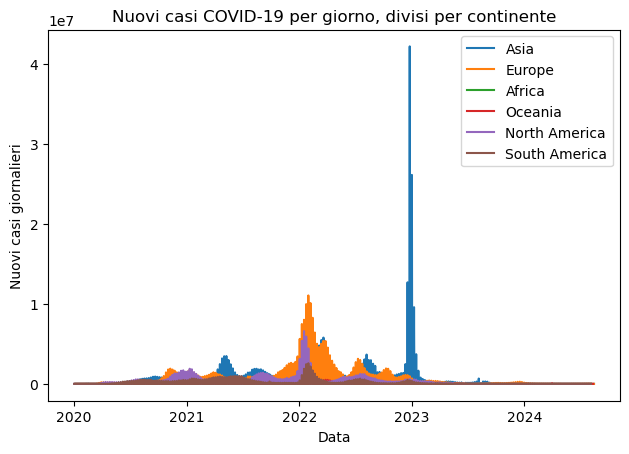

In [33]:
# Per ogni continente, mostra i nuovi casi giornalieri
for continente in df_continenti["continent"].unique():
    dati_continente = df_continenti[df_continenti["continent"] == continente]
    nuovi_casi = dati_continente.groupby("date")["new_cases"].sum()
    plt.plot(nuovi_casi.index, nuovi_casi.values, label=continente)

plt.xlabel("Data")
plt.ylabel("Nuovi casi giornalieri")
plt.title("Nuovi casi COVID-19 per giorno, divisi per continente")
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
# Filtra i dati per l'Italia e per l'anno 2022
italia_2022 = df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]

#Giorni in cui ci sono nuovi casi registrati
italia_2022 = italia_2022[italia_2022["new_cases"].notna()]


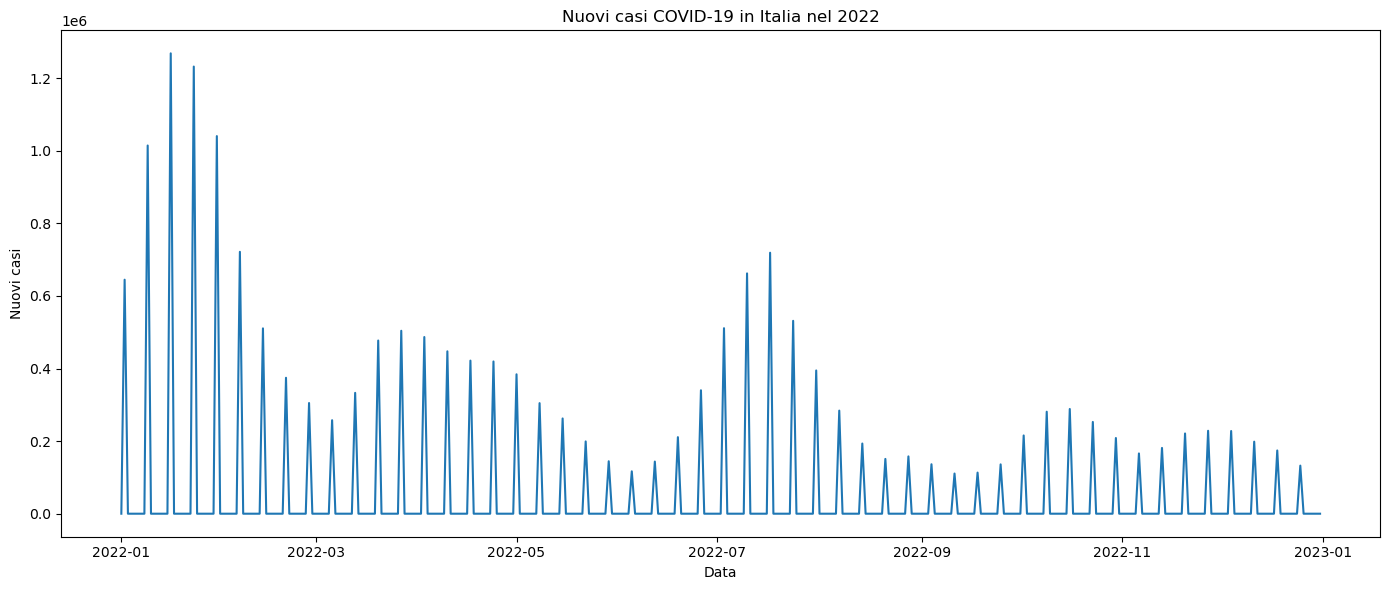

In [37]:
# Imposta le dimensioni del grafico
plt.figure(figsize=(14, 6))

# Disegna la curva dei nuovi casi
plt.plot(italia_2022["date"], italia_2022["new_cases"])

# Aggiunge etichette e titolo
plt.xlabel("Data")
plt.ylabel("Nuovi casi")
plt.title("Nuovi casi COVID-19 in Italia nel 2022")
plt.tight_layout()
plt.show()

In [39]:
#Periodo da maggio 2022 ad aprile 2023
inizio = "2022-05-01"
fine = "2023-04-30"

#Paesi da analizzare
paesi = ["Italy", "Germany", "France"]

#Filtra i dati per i tre paesi e il periodo indicato
icu_data = df[(df["location"].isin(paesi)) &
              (df["date"] >= inizio) &
              (df["date"] <= fine)]


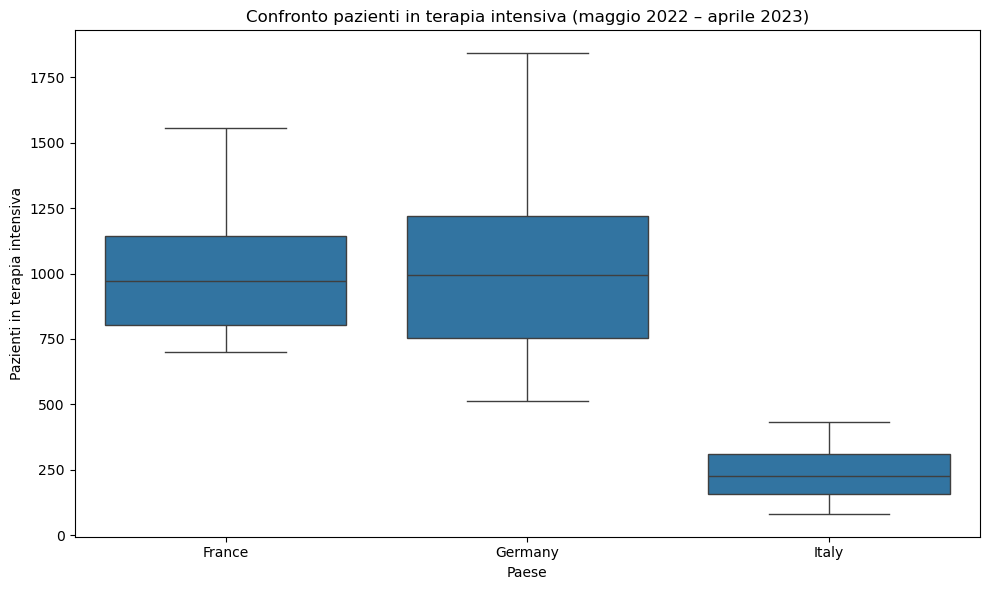

In [41]:
#Righe con valore ICU valido
icu_data_clean = icu_data[["location", "icu_patients"]].dropna()

#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="location", y="icu_patients", data=icu_data_clean)

#titolo
plt.xlabel("Paese")
plt.ylabel("Pazienti in terapia intensiva")
plt.title("Confronto pazienti in terapia intensiva (maggio 2022 – aprile 2023)")
plt.tight_layout()
plt.show()


In [47]:
#il boxplot rappresenta che la Germania ha avuto piu pazienti in terapia intesiva rispetto ad Italia e Francia nel periodo analizzato

In [51]:
# Lista dei paesi da analizzare
paesi_2021 = ["Italy", "Germany", "France", "Spain"]

# Filtra per i paesi indicati e per l'anno 2021
df_2021 = df[(df["location"].isin(paesi_2021)) & 
             (df["date"].dt.year == 2021)]


In [53]:
#Somma dei pazienti ospedalizzati per ciascun paese
hosp_totali = df_2021.groupby("location")["hosp_patients"].sum()

#Risultato
print("Totale pazienti ospedalizzati nel 2021:")
print(hosp_totali)


Totale pazienti ospedalizzati nel 2021:
location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


In [55]:
# Conta i valori nulli nella colonna hosp_patients per ciascun paese
missing_hosp = df_2021.groupby("location")["hosp_patients"].apply(lambda x: x.isnull().sum())

# Mostra il risultato
print("\nValori mancanti per 'hosp_patients' nel 2021:")
print(missing_hosp)


Valori mancanti per 'hosp_patients' nel 2021:
location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64
